# <span style="color:teal;">CIS 211 Project 4:  Orbits</span>

##### Due 11:00 P.M. February 3, 2017

##### Reading:  M&R 10.6.3

###  <span style="color:teal">Vector and Body Classes</span>

This week's project will build on the Vector and Body classes from last week in order to create a complete simulation of the Solar System.  There are two ways to define these classes:  (1) copy your definitions from last week's project, or (2) download the instructor's solution from Canvas.

Instructions for both methods are in the next two sections.  **Use either of these methods, but not both.**  

Note: you will earn **extra credit points** if you use your own code.

####  <span style="color:teal">Option 1: &nbsp; Use Your Own Classes</span>

Choose this method only if your classes passed all the unit tests. Copy the complete Vector and Body class definitions from last week's notebook and paste them into the code cells below.  

In [1]:
from math import sqrt

class Vector:
    """
    A Vector is a 3-tuple of (x,y,z) coordinates.
    """
    def __init__(self, x, y, z):
        self._x = x
        self._y = y
        self._z = z
    
    def x(self):
        return self._x
    
    def y(self):
        return self._y

    def z(self):
        return self._z
    
    def __repr__(self):
        return ('({:.3g},{:.3g},{:.3g})').format(self._x, self._y, self._z)
    
    def __eq__(self, other):
        if (self._x, self._y, self._z) == (other.x(), other.y(), other.z()):
            return True
    
    def __add__(self, other):
        new_Vec = Vector((self._x + other.x()), (self._y + other.y()), (self._z + other.z()))
        return new_Vec
    
    def __sub__(self, other):
        return Vector((self._x - other.x()), (self._y - other.y()), (self._z - other.z()))
        
    def __mul__(self, other):
        if isinstance(other, int) or isinstance(other, float):
            return Vector(self._x * other, self._y * other, self._z * other)
        
    def norm(self):
        return sqrt(self._x * self._x + self._y * self._y + self._z * self._z)
        
    def clear(self):
        self._x = 0
        self._y = 0
        self._z = 0

In [2]:
G = 6.67E-11

class Body:
    """
    A Body object represents the state of a celestial body.  A body has mass 
    (a scalar), position (a vector), and velocity (a vector).  A third vector, 
    named force, is used when calculating forces acting on a body.  An
    optional name can be attached to use in debugging.
    """
    
    def __init__(self, mass = 0, position = Vector(0,0,0), velocity = Vector(0,0,0), name = None):
        """
        Create a new Body object with the specified mass (a scalar), position (a vector), 
        and velocity (another vector).  A fourth argument is an optional name for the body.
       """
        self._mass = mass
        self._position = position
        self._velocity = velocity
        self._force = Vector(0,0,0)
        self._name = name

    def __repr__(self):
        if self._name != None:
            return '{}: {:.3g}kg {} {}'.format(self._name, self._mass, str(self._position), str(self._velocity))
        else:
            return '{:.3g}kg {} {}'.format(self._mass, str(self._position), str(self._velocity))
    
    def name(self):
        return self._name

    def mass(self):
        return self._mass

    def position(self):
        return self._position

    def velocity(self):
        return self._velocity

    def force(self):
        return self._force
    
    def direction(self, other):
        return Vector((other.position().x() - self.position().x() if self.position().x() >= other.position().x() else other.position().x() - self.position().x()),
                     (other.position().y() - self.position().y() if self.position().y() >= other.position().y() else other.position().y() - self.position().y()),
                     (other.position().z() - self.position().z() if self.position().z() >= other.position().z() else other.position().z() - self.position().z()))
    
    def add_force(self, other):
        d_vec = self.direction(other)
        denom = d_vec.norm() * d_vec.norm() * d_vec.norm()
        force = d_vec * (other.mass() / denom)
        
        self._force = self._force + force
        
    def clear_force(self):
        self._force.clear()
                
    def move(self, dt):
        accel = self._force * G
        
        self._velocity = self._velocity + accel * dt
        
        self._position = self._position + self._velocity * dt


####  <span style="color:teal">Option 2: &nbsp; Download a (`.pyc`) File from Canvas </span>

If your classes did not pass all the unit tests you need to download a  "compiled Python" (`.pyc`) file from the Files section on Canvas.

The file you need has a name that ends with `cpython-3x.pyc` where `x` is either 4 (for Python 3.4) or 5 (for Python 3.5). To see which version of Python you have, select About from Jupyter's Help menu.
* it does not matter which OS you have, the `.pyc` files work for Mac, Windows, or Linux
* if you need the `.pyc` file for Python 3.6 send e-mail to `cis211-help`

Download one of the `Body.cpython-3x.pyc` files, rename it `Body.pyc`, and move it to the same folder as this notebook.  Then uncomment and execute the `import` command in the code cell below.

In [3]:
#from Body import *

###  <span style="color:teal">Libraries</span>

Execute the following code cell each time you open this notebook.

In [4]:
from copy import deepcopy

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

###  <span style="color:teal">Solar System</span>

Execute this code cell to create a list of Body objects for the sun and the 9 planets.  The positions and initial velocities are from a "snapshot" of the solar system from January 1, 1970.

**Do not change this cell.** &nbsp; The autograder will use these Body objects to test your simulation.

In [5]:
solar_system = [
    Body(1.9891E+30,  Vector(0,0,0), Vector(0,0,0)),
    Body(3.302E+23,   Vector(3.83713E+10,2.877025E+10,-1.175808E+09),    Vector(-38787.67,41093.05,6918.461)),
    Body(4.8685E+24,  Vector(-5.377313E+09,-1.085956E+11,-1.164748E+09), Vector(34741.48,-1865.747,-2031.506)),
    Body(5.9736E+24,  Vector(-2.700743E+10,1.446007E+11,9686451),        Vector(-29770.44,-5568.042,0.3961261)),
    Body(6.4185E+23,  Vector(1.983825E+11,7.422924E+10,-3.334841E+09),   Vector(-7557.626,24761.27,704.7457)),
    Body(1.89813E+27, Vector(-7.496502E+11,-3.201711E+11,1.811155E+10),  Vector(4982.522,-11417.83,-64.66531)),
    Body(5.68319E+26, Vector(1.082806E+12,8.510841E+11,-5.793461E+10),   Vector(-6487.118,7565.952,125.4422)),
    Body(8.68103E+25, Vector(-2.724616E+12,-2.894003E+11,3.428801E+10),  Vector(671.3469,-7099.093,-35.04028)),
    Body(1.0241E+26,  Vector(-2.328072E+12,-3.891086E+12,1.337436E+11),  Vector(4633.961,-2767.423,-49.57268)),
    Body(1.314E+22,   Vector(-4.551135E+12,3.175277E+11,1.282177E+12),   Vector(635.998,-5762.115,440.8821))
]

###  <span style="color:teal">Part 1: &nbsp; Draw Concentric Circles (25 points)</span>

Fill in the body of the function definition below so it draws a set of concentric circles.  Each circle will actually be a sequence of connected line segments drawn by a call to the `plot` function.  The parameters are:
* the number of circles to draw
* the diameter of the innermost circle
* the diameter of the outermost circle
* the number of line segments in each circle

Use the inner and outer diameters to compute euqally spaced diameters for the other circles.  For example, if the call is
```
>>> concentric(ncircles=5, inner=5, outer=9)
```
the function should draw circles with diameters 5, 6, 7, 8, and 9.

####  <span style="color:teal">Hint </span>

For a circle with radius $r$ the $(x,y)$ coordinates of the point at  angle $\alpha$ are $x = r \cos \alpha$ and $y = r \sin \alpha$.

![circle](http://pages.uoregon.edu/conery/CIS211/Orbits/circle.png)

The following expressions will create lists of $x$ and $y$ coordinates for $n$ equally spaced points around the perimeter of a circle with radius 1.

In [6]:
from math import pi as π, sin, cos

In [7]:
n = 15
x = [ 2* cos(2*π*i/n) for i in range(n+1) ]
y = [ 2* sin(2*π*i/n) for i in range(n+1) ]

**Note:** &nbsp; These lists have $n+1$ values so the last line segment "completes the circle" and connects back to the starting point.

##### <span style="color:red">Code:</span>

In [8]:
def circle_pts(radius, seg):
        x = [ radius * cos(2*π*i/seg) for i in range(seg+1) ]
        y = [ radius * sin(2*π*i/seg) for i in range(seg+1) ]
        
        return x,y

In [9]:
def concentric(ncircles=3, inner=1, outer=2, nsegs=30):
    step = round((outer - inner) / ncircles)
    circle_rads = [i for i in np.linspace(inner, outer, ncircles)]
    
    plt.plot(*circle_pts(inner, nsegs))
    plt.plot(*circle_pts(outer, nsegs))
    
    for i in range(ncircles - 1):
        plt.plot(*circle_pts(circle_rads[i + 1], nsegs))

##### <span style="color:red">Tests:</span>

Use the following code cell as a "sandbox" if you want to do your own tests.  You can add additional cells here if you want.

##### <span style="color:red">Autograder Tests:</span>

The autograder cells use a different strategy for this part of the project.  The autograder will just make sure your function does not crash.  The human grader will look at the drawing to assign points for correctness.

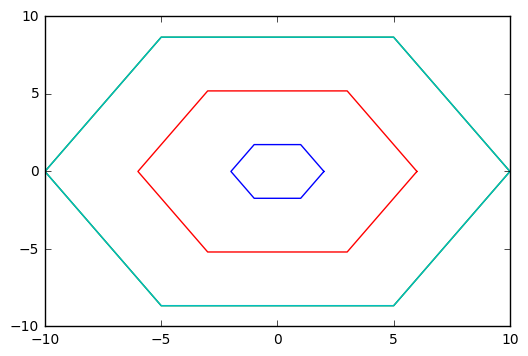

In [10]:
concentric(ncircles=3, inner=2, outer=10, nsegs=6)

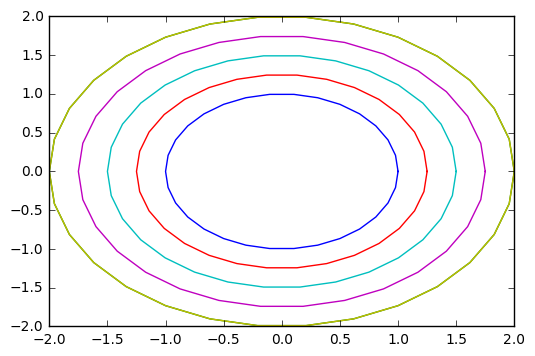

In [11]:
concentric(ncircles=5)

##### <span style="color:red">Documentation:</span>

Plots n circles of interpolating radius size. Sizes are determined by inner and outer circle sizes who are passed in as the second and third arguments. Final (fourth) argument determines how many segments are used to draw the circle.

Cool things:
- uses Python's * tool to pass a tuple as two separate arguments at once into the "circle_pts" helper method
- uses numpy's linspace() function in order to find interpolating values

###  <span style="color:teal">Part 2: &nbsp; Solar System (40 points)</span>

To run the full N-body simulation we need to calculate all pairwise interactions between the bodies.  On each time step, first update each body's force vector:
```
for i = 0 to n-1:
  for j = 0 to n-1:
    if i != j:
      add the force of body j to body i's force vector
```
Now uses the accumulated forces to move each body and clear the force vector so it's ready for the next time step:
```
for i = 0 to n-1:
   move body i
   clear forces on body i
```

Fill in the body of the function named `step_system`.  The arguments to this function are
* a list of Body objects
* a time step size (default 86459, the number of seconds in 1/365 of a year)
* the number of time steps to simulate (default 1)

The return value should be a list of orbits.  If there are $n$ bodies passed to the function, the output will be a list of $n$ sequences containing the $(x,y)$ coordinates of each body at each time step.

For example, to simulate one year of the solar system, using the list of Body object defined above:
```
orbits = step_system(solar_system, nsteps=365)
```
The output will be a list of 10 lists:
```
[ 
  [(sx0,sy0), (sx1,sy1), (sx2,sy2), ...],
  [(mx0,my0), (mx1,my1), (mx2,my2), ...],
  ...
  [(px0,py0), (px1,py1), (px2,py2), ...]
]
```
where `sx` and `sy` are the $x$ and $y$ coordinates of the first body (the Sun), `mx` and `my` are the coordinates of the second body (Mercury), _etc_.

**Note** &nbsp; Each time you call your `step_system` function it's going to change the position vectors in the Body objects.  To make sure you have a "clean copy" each time you test your code either go back and re-execute the cell that defines the solar system or make a copy of the solar system to use in your test:
```
ss = deepcopy(solar_system)
```

##### <span style="color:red">Code:</span>

In [12]:
def step_system(bodies, dt=86459, nsteps=1):
    orbits = [list() for i in range(len(bodies))] # n empty lists where n = bodies
    for i in range(nsteps):
        for topbody in bodies:
            for body in bodies:
                if topbody != body:
                    topbody.add_force(body)
        for idx,body in enumerate(bodies):
            body.move(dt)
            body.clear_force()
            pos = body.position().x(), body.position().y()
            orbits[idx].append(pos)
            
    return orbits

##### <span style="color:red">Tests:</span>

Use the following code cell as a "sandbox" if you want to do your own tests.  You can add additional cells here if you want.

##### <span style="color:red">Autograder Tests:</span>

Test 1:  Run the simulation for 5 time steps.  The return value should be a list of 10 orbits, and each orbit should have 5 pairs.

In [13]:
ss = deepcopy(solar_system)
orbits = step_system(ss, nsteps=5, dt=86400)

assert isinstance(orbits,list)
assert len(orbits) == 10
assert sum([len(x) for x in orbits]) == 50

Test 2:  Run the simulation long enough for Mercury to make one full orbit (about 88 Earth days), see if it's close to where it started.

In [14]:
ss = deepcopy(solar_system)
start = deepcopy(ss[1].position())            # Mercury's starting position
step_system(ss, nsteps=1000, dt=7600.5216)
stop = ss[1].position()                       # Mercury's final position

assert (stop-start).norm() < 1e10

##### <span style="color:red">Documentation:</span>

Using the previously defined Body and Vector classes, a semi-comprehensive solar system simulation is made possible. The step_system function takes a list of bodies, a time step size (to be used when calculating movements in the body class) and a number of times to run this time step (compounding on top of each previous calculation).

Returns a list of lists, where each list contains the positions of a singular body at each timestep (ie, orbits[0][24] would return the 25th time step location of the first planet in the returned "orbits" list).

Cool stuff:
- Utilizes the Python enumerate() function in a for loop

###  <span style="color:teal">Part 3: &nbsp; Plotting Orbits (35 points)</span>

Complete the definition of the `plot_orbits` function below.  The first four lines will run the simulation, using your `step_system` function, and figure out how many orbits to plot.  You need to fill in the rest:  extract the $x$ and $y$ coordinates from the list returned by `step_system` and plot the orbits.

##### <span style="color:red">Code:</span>

In [15]:
def plot_orbits(bodies, ndays = 365, nplanets=None):
    bodies = deepcopy(bodies)
    orbits = step_system(bodies, nsteps=ndays)
    if nplanets is None:
        nplanets = len(bodies)

    for planet in orbits: # First level of lists
        xcoords = []
        ycoords = []
        for xy in planet:
            xcoords.append(xy[0])
            ycoords.append(xy[1])
        plt.plot(xcoords, ycoords)

##### <span style="color:red">Tests:</span>

Use the following code cell as a "sandbox" if you want to do your own tests.  You can add additional cells here if you want.

##### <span style="color:red">Autograder Tests:</span>

The autograder will call your `plot_orbits` function, the human grader will assign points based on the plot.

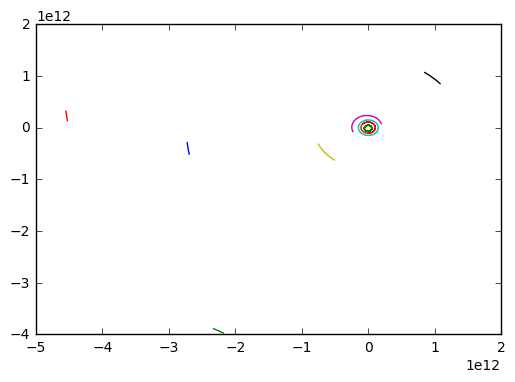

In [16]:
plot_orbits(solar_system, nplanets=5)

##### <span style="color:red">Documentation:</span>

plot_orbits plots a view of a given system of bodies over ndays (passed in as second argument).
Depends on:
- Body and Vector classes
- step_system function